## AdaBoost: Classifying Heart Disease or No Heart Disease

## What is AdaBoost?

**AdaBoost** (short for Adaptive Boosting) is a machine learning method that combines many small, simple models—called weak learners—to create a stronger, more accurate model. It works by training each new model to focus on the examples that the previous ones got wrong. Over time, the model improves by paying more attention to the “harder” cases. It’s like having a team of tutors, where each one focuses on fixing the mistakes the others made.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

## Our Task
We will be predicting the occurrence of heart disease in patients using **AdaBoost** technique.


##  Load and Preprocess the Hearts Dataset
We will use the `hearts` dataset and classify a patient as either **Has Heart Disease**(label=1) or **Does not have Heart Disease**(label=0)

We'll also drop any rows with missing values.

## Normalize and Prepare Features
Logistic regression works best when the input features are on a similar scale. We'll normalize the features to have mean 0 and standard deviation 1.

In [2]:
# Load and process the heart dataset 
data = pd.read_csv("heart.csv")
hearts = data.copy(deep = True)

le = LabelEncoder()#Label Encoding

#Label Encode all Categorical data
hearts['Sex'] = le.fit_transform(hearts['Sex'])
hearts['ChestPainType'] = le.fit_transform(hearts['ChestPainType'])
hearts['RestingECG'] = le.fit_transform(hearts['RestingECG'])
hearts['ExerciseAngina'] = le.fit_transform(hearts['ExerciseAngina'])
hearts['ST_Slope'] = le.fit_transform(hearts['ST_Slope'])

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#Normalize Oldpeak and Standardize the rest of the numerical data
hearts['Oldpeak'] = mms.fit_transform(hearts[['Oldpeak']])
hearts['Age'] = ss.fit_transform(hearts[['Age']])
hearts['RestingBP'] = ss.fit_transform(hearts[['RestingBP']])
hearts['Cholesterol'] = ss.fit_transform(hearts[['Cholesterol']])
hearts['MaxHR'] = ss.fit_transform(hearts[['MaxHR']])
hearts.head

<bound method NDFrame.head of           Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140    1              1   0.410909     0.825070          0   
1   -0.478484    0              2   1.491752    -0.171961          0   
2   -1.751359    1              1  -0.129513     0.770188          0   
3   -0.584556    0              0   0.302825     0.139040          0   
4    0.051881    1              2   0.951331    -0.034755          0   
..        ...  ...            ...        ...          ...        ...   
913 -0.902775    1              3  -1.210356     0.596393          0   
914  1.536902    1              0   0.627078    -0.053049          1   
915  0.370100    1              0  -0.129513    -0.620168          0   
916  0.370100    0              1  -0.129513     0.340275          0   
917 -1.645286    1              2   0.302825    -0.217696          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             1  1.382928  

# Features Selection
To better understand why we selected these specific features for classification, read the **Perceptron_hearts** file.

We'll select the "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex","ChestPainType","Cholesterol", and "FastingBS" for classification.

In [3]:
features = [
    "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex", "HeartDisease","ChestPainType","Cholesterol","FastingBS"
]
filtered_df= hearts[features].reset_index(drop=True)
X = filtered_df[filtered_df.columns.drop(['HeartDisease'])].values
y = filtered_df['HeartDisease'].values

## Splitting Data into Training and Test Sets

We split our dataset into training and testing sets to evaluate model performance later.

In [4]:
#Split data into test and trainung data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## AdaBoost Implementation
We will implement the **AdaBoost** technique using the **AdaBoostClassifier** from the **sklearn.ensemble** module

Here we train our model and predict using the test values

In [5]:
# Create and train AdaBoost classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=10,
    algorithm="SAMME",
    learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

# Make predictions
ada_y_pred = ada_clf.predict(X_test)

## Feature Importance in Patient Classification

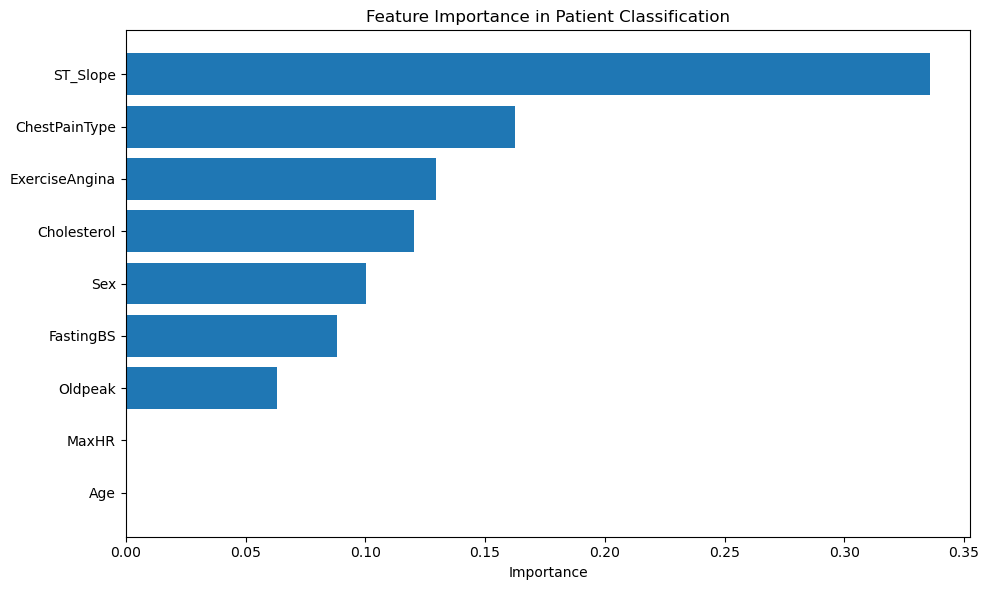

In [9]:
# create a features list without HeartDisease
features_new=[
    "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex","ChestPainType","Cholesterol","FastingBS"
]
# Make sure features and importances align
importances = ada_clf.feature_importances_
if len(features_new) != len(importances):
    print(f"Length mismatch: features = {len(features_new)}, importances = {len(importances)}")
    # Optionally slice the longer one
    min_len = min(len(features_new), len(importances))
    features_new = features_new[:min_len]
    importances = importances[:min_len]

# Create and plot feature importance
feature_importance = pd.DataFrame({
    'Feature': features_new,
    'Importance': importances
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Patient Classification')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## Evaluate the Model Accuracy

Here we plot a confusion matrix and give a classification report on the model.

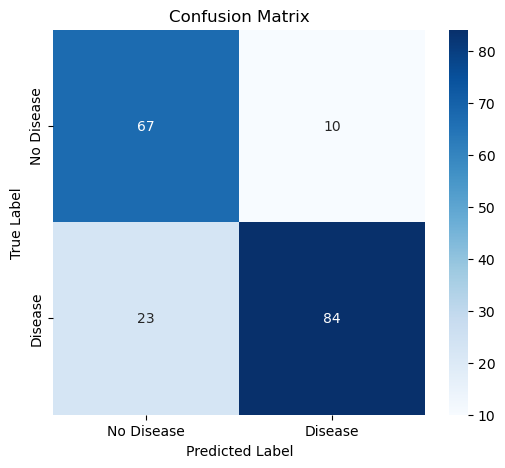

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.74      0.87      0.80        77
     Disease       0.89      0.79      0.84       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



In [ ]:
y_pred=ada_y_pred
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

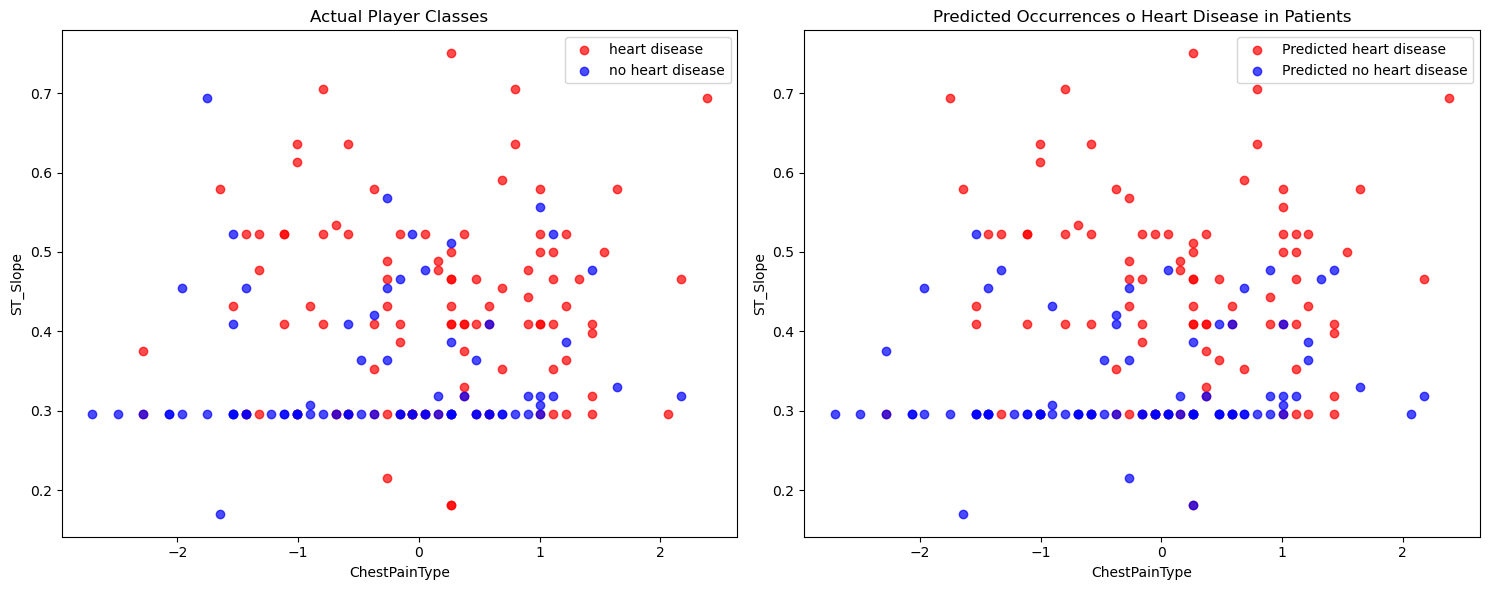

In [ ]:
y_pred = ada_y_pred
# Create two subplots side by side
plt.figure(figsize=(15, 6))

# First subplot - Actual classes
plt.subplot(1, 2, 1)
top_features = feature_importance.tail(2)['Feature'].values

# Plot actual heart disease patients (y_test == 1) in red
plt.scatter(X_test[y_test == 1, 0], 
           X_test[y_test == 1, 1],
           label='heart disease', alpha=0.7, color='red')

# Plot actual non-heart disease patients (y_test == -1) in blue
plt.scatter(X_test[y_test == 0, 0], 
           X_test[y_test == 0, 1],
           label='no heart disease', alpha=0.7, color='blue')

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Actual Occurrences of Heart Disease in Patients')
plt.legend()

# Second subplot - Predicted classes
plt.subplot(1, 2, 2)

# Plot predicted heart disease patients (y_pred == 1) in red
plt.scatter(X_test[y_pred == 1, 0], 
           X_test[y_pred == 1, 1],
           label='Predicted heart disease', alpha=0.7, color='red')

# Plot predicted non-heart disease patients (y_pred == -1) in blue
plt.scatter(X_test[y_pred == 0, 0], 
           X_test[y_pred == 0, 1],
           label='Predicted no heart disease', alpha=0.7, color='blue')

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Predicted Occurrences of Heart Disease in Patients')
plt.legend()

plt.tight_layout()
plt.show()